# Assigment 1: Dimensionality Reduction using PCA
## Unsupervised & Reinforcement Learning (SEC.001)
> Author: Young Park, 301200413

### Question 1

1. Retireve and load mnist_784 dataset

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [2]:
print(dir(mnist))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [3]:
print(mnist['target'][0:10])

[5 0 4 1 9 2 1 3 1 4]


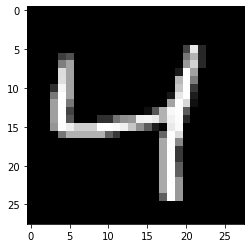

In [4]:
# mnist['data'][5].reshape(28,28)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(mnist['data'][2].reshape(28,28), cmap='gray')
plt.show()

In [5]:
for i in range(10):
    x = np.where(mnist['target'] == i)[0][0]

    print(x)

1
3
5
7
2
0
13
15
17
4


In [6]:
# for i in range(10):
#     fig = plt.figure()
#     ax = fig.add_subplot(1,1,1)
#     target_index = np.where(mnist['target'] == i)[0][0]
#     ax.imshow(mnist['data'][target_index].reshape(28,28), cmap='gray')
#     ax.set_axis_off()
#     plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0, random_state=13)



2. Display each digits

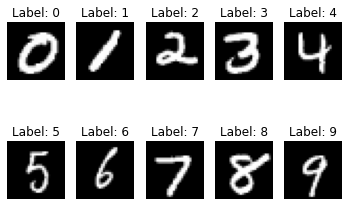

In [8]:
fig = plt.figure()
for i in range(10):
    img_indx = np.where(y_train == i)[0][0]
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(X_train[img_indx].reshape(28, 28), cmap='gray')
    ax.set_title('Label: {}'.format(y_train[img_indx]))
    ax.axis('off')
plt.show()


3. Use PCA to retrieve the 1st and the 2nd principal components and variance ratio

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Since we're finding the 1st and the 2nd principal components
principalComponent = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data = principalComponent, columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = y_train

print('Explain variance ratio of component : ')
print(pca.explained_variance_ratio_)
    
print('Principal component : ')
print(pca.components_)

Explain variance ratio of component : 
[0.09755712 0.07163947]
Principal component : 
[[ 1.02910643e-18 -1.50609391e-18  3.27899142e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.14269476e-17  2.29752210e-17 -2.53137614e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


4. Plot the projections of the 1st and the 2nd principal component onto a 2D hyperplane.

IndexError: boolean index did not match indexed array along dimension 1; dimension is 784 but corresponding boolean dimension is 60000

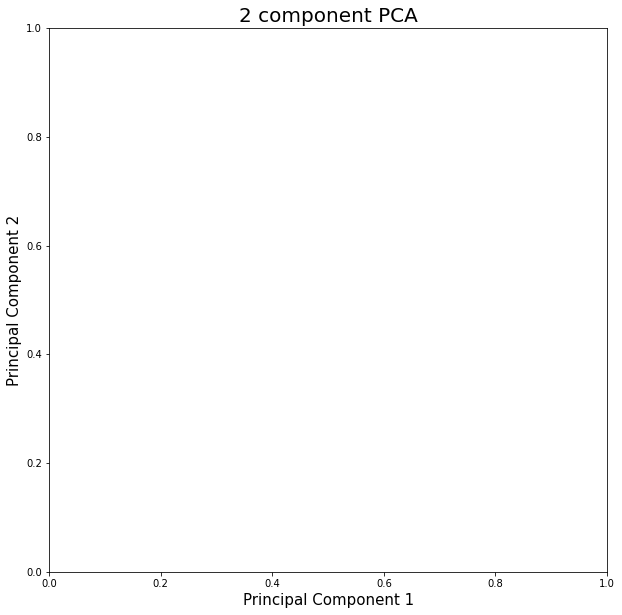

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax.scatter(pca.components_[0, indicesToKeep]
               , pca.components_[1, indicesToKeep]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [14]:
indicesToKeep.size

60000

In [16]:
pca.components_.size

1568